 **Spam Detection Project: Build a binary classification model to classify any online content (including
messages/emails/reviews) as spam or not spam.**

In [3]:
import nltk
# Downloading necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Data Exploration and Preprocessing

In [4]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')

# Data cleaning and preprocessing
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['v1'])

# Text preprocessing function
def preprocess_text(text):
    # Converting text to lowercase
    text = text.lower()
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Removing stopwords
    stopwords_list = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stopwords_list]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    # Joining tokens back into text
    text = ' '.join(tokens)
    return text

# Applying preprocessing to the SMS text column
df['processed_text'] = df['v2'].apply(preprocess_text)

# Separating features (processed text) and labels
X = df['processed_text']
y = df['label']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Engineering

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fitting vectorizer on training set and transforming training set
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transforming test set
X_test_tfidf = vectorizer.transform(X_test)

Model Selection and Training

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initializing Multinomial Naive Bayes classifier
model = MultinomialNB()

# Training the model
model.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_tfidf)

Model Evaluation

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



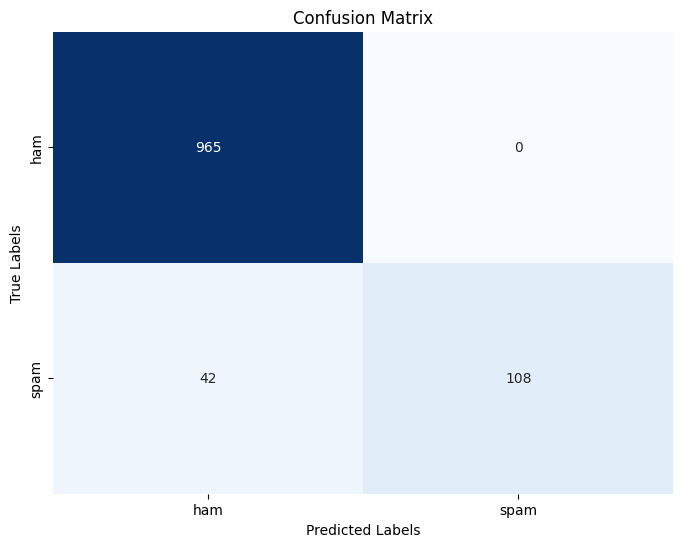

In [7]:
# Evaluating model performance
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Further Optimization (using GridSearchCV)

In [8]:
from sklearn.model_selection import GridSearchCV

# Defining parameter grid
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=5, scoring='accuracy')

# Performing grid search
grid_search.fit(X_train_tfidf, y_train)

# Printing best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Getting the best model
best_model = grid_search.best_estimator_

# Evaluating the best model
y_pred_best = best_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_best))

Best Parameters: {'alpha': 0.1}
Best CV Score: 0.9766637475905041
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Cross-Validation

In [9]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation
scores = cross_val_score(estimator=MultinomialNB(alpha=1.0), X=X_train_tfidf, y=y_train, cv=5, scoring='accuracy')

# Printing cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-Validation Scores: [0.96076233 0.96188341 0.95398429 0.95735129 0.95510662]
Mean CV Accuracy: 0.9578175879371693


Saving the model

In [10]:
import joblib

# Saving the model to disk
filename = 'spam_detection_model.pkl'
joblib.dump(model, filename)

['spam_detection_model.pkl']

Saving the TF-IDF Vectorizer

In [11]:
# Saving the TF-IDF vectorizer separately
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

Making predictions using the saved model

In [12]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the model
model = joblib.load('spam_detection_model.pkl')

# Load the TF-IDF vectorizer
vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [14]:
# Example new data
new_data = [
    "Congratulations! You've won a free cruise! Call now to claim your prize.",
    "Hey, what's up? Are we still meeting at 5?",
    "URGENT: Your account has been compromised. Please click the link to reset your password."
]

# Preprocess the new data using the same preprocessing function
def preprocess_text(text):
    # Converting text to lowercase
    text = text.lower()
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Define stopwords list here
    stopwords_list = set(stopwords.words('english'))
    # Removing stopwords
    tokens = [token for token in tokens if token not in stopwords_list]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    # Joining tokens back into text
    text = ' '.join(tokens)
    return text

# Apply preprocessing to new data
preprocessed_new_data = [preprocess_text(text) for text in new_data]

# Transform the preprocessed data using the TF-IDF vectorizer
X_new_tfidf = vectorizer.transform(preprocessed_new_data)

In [15]:
# Predict using the loaded model
y_new_pred = model.predict(X_new_tfidf)

# Map predictions back to original labels
predicted_labels = encoder.inverse_transform(y_new_pred)

# Print the predictions
for text, predicted_label in zip(new_data, predicted_labels):
    print(f'Text: {text} --> Predicted Label: {predicted_label}')

Text: Congratulations! You've won a free cruise! Call now to claim your prize. --> Predicted Label: spam
Text: Hey, what's up? Are we still meeting at 5? --> Predicted Label: ham
Text: URGENT: Your account has been compromised. Please click the link to reset your password. --> Predicted Label: spam
